In [7]:
#import all libraries
import pyforest
from beautifultable import BeautifulTable
import warnings
warnings.filterwarnings('ignore')

In [9]:
#loading data
data = pd.read_excel(investment_banking.xlsx')

<IPython.core.display.Javascript object>

In [10]:
#its always good pratice to maintain original dataset
data_orig = pd.read_excel('F:\\KSR Consulting Services\\KSR_DS_Sept_Oct_2020\\Domain\\EDA\\Data\\investment_banking.xlsx')
#or
#data_orig = data

<IPython.core.display.Javascript object>

In [12]:
#make sure data is loaded properly
data.shape, data_orig.shape

((753089, 9), (753089, 9))

In [13]:
#view dataset
data.head(5)

,broker_id,city,broker_type,fund_category,email_opened,webex_meet,sales_call,firm_sales,global_sales
0,BRXX-1,"PLANTATION, FL",Inter-dealer broker,Emerging-Markets Local-Currency Bond,NaN,NaN,NaN,174.62,174.62
1,BRXX-1,"BRANFORD, CT",Inter-dealer broker,Utilities,NaN,NaN,NaN,0.00,0.00
2,BRXX-1,"JONESBORO, GA",Inter-dealer broker,Intermediate Government,NaN,NaN,NaN,0.00,0.00
3,BRXX-2,"VIENNA, VA",Inter-dealer broker,Intermediate Government,Y,NaN,NaN,0.00,30709.00
4,BRXX-3,"CHAGRIN FALLS, OH",full-service broker,Target-Date 2050,Y,NaN,Y,0.00,0.00


In [14]:
#function to do basic checks (reusable code)
def basic_check(__input__):
    table = BeautifulTable()
    a = []
    a=__input__.columns
    table.column_headers = ["features","feature_datatype","unique value", "missing_values", "missing_value_%"]
    for i in a:
        table.append_row([i, 
                          __input__[i].dtype,
                          __input__[i].nunique(),
                          __input__[i].isna().sum(),
                          ((__input__[i].isna().sum()) / (__input__[i].shape[0])*100)])
    print(table)

In [15]:
basic_check(data) #call function to see basic details (reusable code)

+-------------+------------------+--------------+--------------+---------------+
|  features   | feature_datatype | unique value | missing_valu | missing_value |
|             |                  |              |      es      |      _%       |
+-------------+------------------+--------------+--------------+---------------+
|  broker_id  |      object      |     1178     |      0       |      0.0      |
+-------------+------------------+--------------+--------------+---------------+
|    city     |      object      |     9813     |      0       |      0.0      |
+-------------+------------------+--------------+--------------+---------------+
| broker_type |      object      |      2       |      0       |      0.0      |
+-------------+------------------+--------------+--------------+---------------+
| fund_catego |      object      |     103      |      0       |      0.0      |
|     ry      |                  |              |              |               |
+-------------+-------------

In [16]:
data.head()

,broker_id,city,broker_type,fund_category,email_opened,webex_meet,sales_call,firm_sales,global_sales
0,BRXX-1,"PLANTATION, FL",Inter-dealer broker,Emerging-Markets Local-Currency Bond,NaN,NaN,NaN,174.62,174.62
1,BRXX-1,"BRANFORD, CT",Inter-dealer broker,Utilities,NaN,NaN,NaN,0.00,0.00
2,BRXX-1,"JONESBORO, GA",Inter-dealer broker,Intermediate Government,NaN,NaN,NaN,0.00,0.00
3,BRXX-2,"VIENNA, VA",Inter-dealer broker,Intermediate Government,Y,NaN,NaN,0.00,30709.00
4,BRXX-3,"CHAGRIN FALLS, OH",full-service broker,Target-Date 2050,Y,NaN,Y,0.00,0.00


## Data Cleaning

In [17]:
#split city feature into city and state
data['city'], data['state'] = data['city'].str.split(',',1).str

In [18]:
#from morning star website
#https://www.morningstar.in/tools/mutual-fund-category-performance.aspx
US_Equity_Fund = ['Large Growth', 'Large Blend','Large Value','Small Growth','Small Value','Small Blend','Mid-Cap Growth','Mid-Cap Value','Mid-Cap Blend']
Allocation_Funds = ['Allocation--85%+ Equity','Target-Date 2060+','Convertibles', 'Target-Date 2055','Target-Date 2050','Target-Date 2045','Target-Date 2040', 'Allocation--70% to 85% Equity', 'Target-Date 2035','Target-Date 2030','Allocation--50% to 70% Equity','Target-Date 2025','World Allocation', 'Tactical Allocation','Target-Date 2020', 'Allocation--30% to 50% Equity', 'Target-Date 2015', 'Target-Date 2000-2010','Target-Date Retirement', 'Allocation--15% to 30% Equity']
Municipal_Bond_Funds = ['Muni National Interm','Muni Single State Short','Muni Single State Interm','Muni California Intermediate','Muni Single State Interm','Muni Massachusetts','Muni New York Long','Muni California Long','Muni Single State Long','Muni National Long','Muni National Short','Muni Pennsylvania','Muni Minnesota','Muni New Jersey','Muni New York Intermediate','Muni Ohio','High Yield Muni']
International_Equity_Funds = ['Latin America Stock','China Region','World Small/Mid Stock','World Large Stock','Diversified Emerging Mkts','Pacific/Asia ex-Japan Stk','Foreign Small/Mid Growth','Foreign Large Growth','Foreign Small/Mid Blend','Foreign Small/Mid Value','Diversified Pacific/Asia','Foreign Large Blend','Europe Stock','Foreign Large Value','Japan Stock','India Equity','Miscellaneous Region']
Taxable_Bond_Funds = ['Preferred Stock', 'High Yield Bond', 'Emerging Markets Bond', 'Emerging-Markets Local-Currency Bond', 'Bank Loan', 'Corporate Bond', 'Multisector Bond', 'Long-Term Bond', 'Nontraditional Bond', 'World Bond', 'Intermediate-Term Bond', 'Inflation-Protected Bond', 'Short-Term Bond', 'Long Government', 'Intermediate Government', 'Ultrashort Bond', 'Short Government']
Alternative_Funds=['Options-based','Long-Short Equity','Multialternative','Long-Short Credit','Multicurrency','Market Neutral','Managed Futures','Bear Market']
Commodities=['Commodities Broad Basket']
Sector_quity_Funds=['Technology','Real Estate','Industrials','Energy Limited Partnership','Equity Energy','Global Real Estate','Financial','Consumer Cyclical','Health','Communications' ,'Infrastructure','Natural Resources','Equity Precious Metals','Consumer Defensive','Utilities']

In [19]:
#define a new feature to seperate funds according to morning stars
data['fund_type'] = data.fund_category.apply(lambda x: 'U.S Equity Funds' if x in US_Equity_Fund 
                                                  else 'Allocation Funds' if x in Allocation_Funds 
                                                  else 'Municipal Bond Funds' if x in Municipal_Bond_Funds
                                                  else 'International Equity Funds' if x in International_Equity_Funds
                                                  else 'Taxable Bond Funds' if x in Taxable_Bond_Funds
                                                  else 'Alternative Funds' if x in Alternative_Funds
                                                  else 'Commodities' if x in Commodities
                                                  else 'Sector Equity Funds')

In [20]:
data.head()

,broker_id,city,broker_type,fund_category,email_opened,webex_meet,sales_call,firm_sales,global_sales,state,fund_type
0,BRXX-1,PLANTATION,Inter-dealer broker,Emerging-Markets Local-Currency Bond,NaN,NaN,NaN,174.62,174.62,FL,Taxable Bond Funds
1,BRXX-1,BRANFORD,Inter-dealer broker,Utilities,NaN,NaN,NaN,0.00,0.00,CT,Sector Equity Funds
2,BRXX-1,JONESBORO,Inter-dealer broker,Intermediate Government,NaN,NaN,NaN,0.00,0.00,GA,Taxable Bond Funds
3,BRXX-2,VIENNA,Inter-dealer broker,Intermediate Government,Y,NaN,NaN,0.00,30709.00,VA,Taxable Bond Funds
4,BRXX-3,CHAGRIN FALLS,full-service broker,Target-Date 2050,Y,NaN,Y,0.00,0.00,OH,Allocation Funds


In [21]:
#missing values
data_orig.head()
sns.heatmap(data_orig.isnull(),yticklabels=False,cbar=False)
#lesser the stripes, more the missing values

<IPython.core.display.Javascript object>

In [22]:
#treating missing values
data['email_opened'] = data['email_opened'].fillna('N')
data['webex_meet'] = data['webex_meet'].fillna('N')
data['sales_call'] = data['sales_call'].fillna('N')

In [23]:
basic_check(data)

+-------------+------------------+--------------+--------------+---------------+
|  features   | feature_datatype | unique value | missing_valu | missing_value |
|             |                  |              |      es      |      _%       |
+-------------+------------------+--------------+--------------+---------------+
|  broker_id  |      object      |     1178     |      0       |      0.0      |
+-------------+------------------+--------------+--------------+---------------+
|    city     |      object      |     7272     |      0       |      0.0      |
+-------------+------------------+--------------+--------------+---------------+
| broker_type |      object      |      2       |      0       |      0.0      |
+-------------+------------------+--------------+--------------+---------------+
| fund_catego |      object      |     103      |      0       |      0.0      |
|     ry      |                  |              |              |               |
+-------------+-------------

In [24]:
#check for any data errors
data['city'].str.isnumeric().sum(), data['city'].str.isalpha().sum()

(37, 546335)

In [25]:
#to check abnormalities in data (city is given with code)
data[data['city'].str.isnumeric()].head(6)

,broker_id,city,broker_type,fund_category,email_opened,webex_meet,sales_call,firm_sales,global_sales,state,fund_type
12956,BRXX-188,64150,Inter-dealer broker,Equity Energy,N,N,N,0.0,0.00,MO,Sector Equity Funds
31538,BRXX-77,15801,Inter-dealer broker,World Small/Mid Stock,N,N,N,0.0,5110.16,PA,International Equity Funds
45478,BRXX-188,64150,Inter-dealer broker,Emerging Markets Bond,N,N,N,0.0,0.00,MO,Taxable Bond Funds
95111,BRXX-77,15801,Inter-dealer broker,World Bond,N,N,N,0.0,0.00,PA,Taxable Bond Funds
107878,BRXX-188,64150,Inter-dealer broker,Short-Term Bond,N,N,N,0.0,0.00,MO,Taxable Bond Funds
122236,BRXX-70,95678,Inter-dealer broker,Allocation--70% to 85% Equity,N,N,N,0.0,670.64,CA,Allocation Funds


In [26]:
#replace code with city names (outsource)
data['city'] = data['city'].str.replace('15801', 'Du Bois')
data['city'] = data['city'].str.replace('64150', 'Riverside')
data['city'] = data['city'].str.replace('95678', 'Roseville')

In [27]:
data[data['city'].str.isnumeric()].head(6)  #make sure there is 0 rows

,broker_id,city,broker_type,fund_category,email_opened,webex_meet,sales_call,firm_sales,global_sales,state,fund_type


In [28]:
data['state'] = data['state'].str.replace(' ', '')

In [29]:
data.head(5)

,broker_id,city,broker_type,fund_category,email_opened,webex_meet,sales_call,firm_sales,global_sales,state,fund_type
0,BRXX-1,PLANTATION,Inter-dealer broker,Emerging-Markets Local-Currency Bond,N,N,N,174.62,174.62,FL,Taxable Bond Funds
1,BRXX-1,BRANFORD,Inter-dealer broker,Utilities,N,N,N,0.00,0.00,CT,Sector Equity Funds
2,BRXX-1,JONESBORO,Inter-dealer broker,Intermediate Government,N,N,N,0.00,0.00,GA,Taxable Bond Funds
3,BRXX-2,VIENNA,Inter-dealer broker,Intermediate Government,Y,N,N,0.00,30709.00,VA,Taxable Bond Funds
4,BRXX-3,CHAGRIN FALLS,full-service broker,Target-Date 2050,Y,N,Y,0.00,0.00,OH,Allocation Funds


In [30]:
#after semgenting into city and state.. we observed state is 2 character word.. lets see if its true or not
data[data["state"].str.len() > 2]

,broker_id,city,broker_type,fund_category,email_opened,webex_meet,sales_call,firm_sales,global_sales,state,fund_type
4290,BRXX-84,BEL AIR,Inter-dealer broker,Large Value,Y,N,N,0.0,4535.00,",MD",U.S Equity Funds
9304,BRXX-55,WEST HARTFORD,Inter-dealer broker,Large Value,Y,N,N,0.0,3646.28,",CT",U.S Equity Funds
20477,BRXX-70,MOUNT PLEASANT,Inter-dealer broker,Europe Stock,N,N,N,0.0,0.00,",WI",International Equity Funds
25986,BRXX-70,MOUNT PLEASANT,Inter-dealer broker,Large Growth,N,N,N,0.0,150.69,",WI",U.S Equity Funds
26244,BRXX-84,BEL AIR,Inter-dealer broker,Large Growth,Y,N,N,0.0,18264.18,",MD",U.S Equity Funds
50331,BRXX-84,BEL AIR,Inter-dealer broker,Target-Date 2050,Y,N,N,0.0,1400.00,",MD",Allocation Funds
58527,BRXX-84,BEL AIR,Inter-dealer broker,Foreign Large Growth,Y,N,N,0.0,1813.55,",MD",International Equity Funds
64117,BRXX-80,KNOXVILLE,Inter-dealer broker,Mid-Cap Growth,N,N,N,0.0,600.00,"TN,TN",U.S Equity Funds
68941,BRXX-55,WEST HARTFORD,Inter-dealer broker,Short-Term Bond,Y,N,N,0.0,686.83,",CT",Taxable Bond Funds
73940,BRXX-312,BARRE,Inter-dealer broker,Equity Precious Metals,N,N,N,0.0,637.50,",VT",Sector Equity Funds


In [31]:
#to remove extra column and extra space
data['state'] = data['state'].str.replace(',', '')
data['state'] = data['state'].str.replace(' ', '') 

In [32]:
data[data["state"].str.len() > 2] #verified again

,broker_id,city,broker_type,fund_category,email_opened,webex_meet,sales_call,firm_sales,global_sales,state,fund_type
64117,BRXX-80,KNOXVILLE,Inter-dealer broker,Mid-Cap Growth,N,N,N,0.0,600.00,TNTN,U.S Equity Funds
105020,BRXX-80,KNOXVILLE,Inter-dealer broker,Bank Loan,N,N,N,0.0,0.00,TNTN,Taxable Bond Funds
161873,BRXX-80,KNOXVILLE,Inter-dealer broker,World Small/Mid Stock,N,N,N,0.0,244.78,TNTN,International Equity Funds
168087,BRXX-80,KNOXVILLE,Inter-dealer broker,Allocation--70% to 85% Equity,N,N,N,0.0,75.00,TNTN,Allocation Funds
168090,BRXX-80,KNOXVILLE,Inter-dealer broker,High Yield Muni,N,N,N,0.0,345.98,TNTN,Municipal Bond Funds
188332,BRXX-80,KNOXVILLE,Inter-dealer broker,Long-Short Credit,N,N,N,0.0,0.00,TNTN,Alternative Funds
215953,BRXX-80,KNOXVILLE,Inter-dealer broker,Large Growth,N,N,N,0.0,28803.07,TNTN,U.S Equity Funds
215964,BRXX-80,KNOXVILLE,Inter-dealer broker,Short-Term Bond,N,N,N,0.0,325.00,TNTN,Taxable Bond Funds
216873,BRXX-373,WASHINGTON,Inter-dealer broker,World Bond,N,N,N,0.0,0.00,DCDC,Taxable Bond Funds
257010,BRXX-80,KNOXVILLE,Inter-dealer broker,Allocation--30% to 50% Equity,N,N,N,0.0,25118.00,TNTN,Allocation Funds


In [33]:
#data correction
data['state'] = data['state'].str.replace('DCDC', 'DC')
data['state'] = data['state'].str.replace('TNTN', 'TN')
data['state'] = data['state'].str.replace('CACA', 'CA')
data['state'] = data['state'].str.replace('NYNY', 'NY')
data['state'] = data['state'].str.replace('TXTX', 'TX')

In [34]:
data[data["state"].str.len() > 2] #check again make sure it returns 0 rows

,broker_id,city,broker_type,fund_category,email_opened,webex_meet,sales_call,firm_sales,global_sales,state,fund_type


In [35]:
data.head()

,broker_id,city,broker_type,fund_category,email_opened,webex_meet,sales_call,firm_sales,global_sales,state,fund_type
0,BRXX-1,PLANTATION,Inter-dealer broker,Emerging-Markets Local-Currency Bond,N,N,N,174.62,174.62,FL,Taxable Bond Funds
1,BRXX-1,BRANFORD,Inter-dealer broker,Utilities,N,N,N,0.00,0.00,CT,Sector Equity Funds
2,BRXX-1,JONESBORO,Inter-dealer broker,Intermediate Government,N,N,N,0.00,0.00,GA,Taxable Bond Funds
3,BRXX-2,VIENNA,Inter-dealer broker,Intermediate Government,Y,N,N,0.00,30709.00,VA,Taxable Bond Funds
4,BRXX-3,CHAGRIN FALLS,full-service broker,Target-Date 2050,Y,N,Y,0.00,0.00,OH,Allocation Funds


In [36]:
basic_check(data)

+-------------+------------------+--------------+--------------+---------------+
|  features   | feature_datatype | unique value | missing_valu | missing_value |
|             |                  |              |      es      |      _%       |
+-------------+------------------+--------------+--------------+---------------+
|  broker_id  |      object      |     1178     |      0       |      0.0      |
+-------------+------------------+--------------+--------------+---------------+
|    city     |      object      |     7272     |      0       |      0.0      |
+-------------+------------------+--------------+--------------+---------------+
| broker_type |      object      |      2       |      0       |      0.0      |
+-------------+------------------+--------------+--------------+---------------+
| fund_catego |      object      |     103      |      0       |      0.0      |
|     ry      |                  |              |              |               |
+-------------+-------------

# EDA
### 1. Data Gathering
### 2. Data Cleaning
### 3. Observation
### 4. Analysis (Graphs - Uni-Variate, Bi-Variate)
### 5. Insights

## Observations

In [37]:
#total number of brokers
print("Total numbers of Brokers - ", data['broker_id'].nunique())
#total number of cities
print("Total numbers of Cities - ", data['city'].nunique())
#total number of states
print("Total numbers of States - ", data['state'].nunique())
#total number of fund category
print("Total numbers of fund category - ", data['fund_category'].nunique())
#total number of fund types
print("Total numbers of fund types (from morning star) - ", data['fund_type'].nunique())

Total numbers of Brokers -  1178
Total numbers of Cities -  7272
Total numbers of States -  53
Total numbers of fund category -  103
Total numbers of fund types (from morning star) -  8


## Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

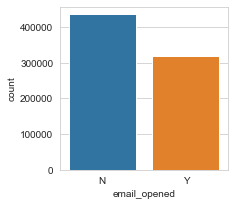

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,3))
sns.countplot(x='email_opened',data=data)
#how many transactions happened with email opened

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

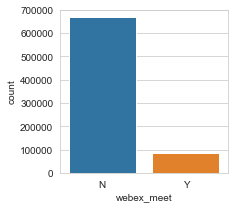

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,3))
sns.countplot(x='webex_meet',data=data)
#how many transactions happened with webex meet

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

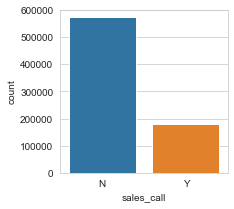

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,3))
sns.countplot(x='sales_call',data=data)
#how many transactions happened with sales meet

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

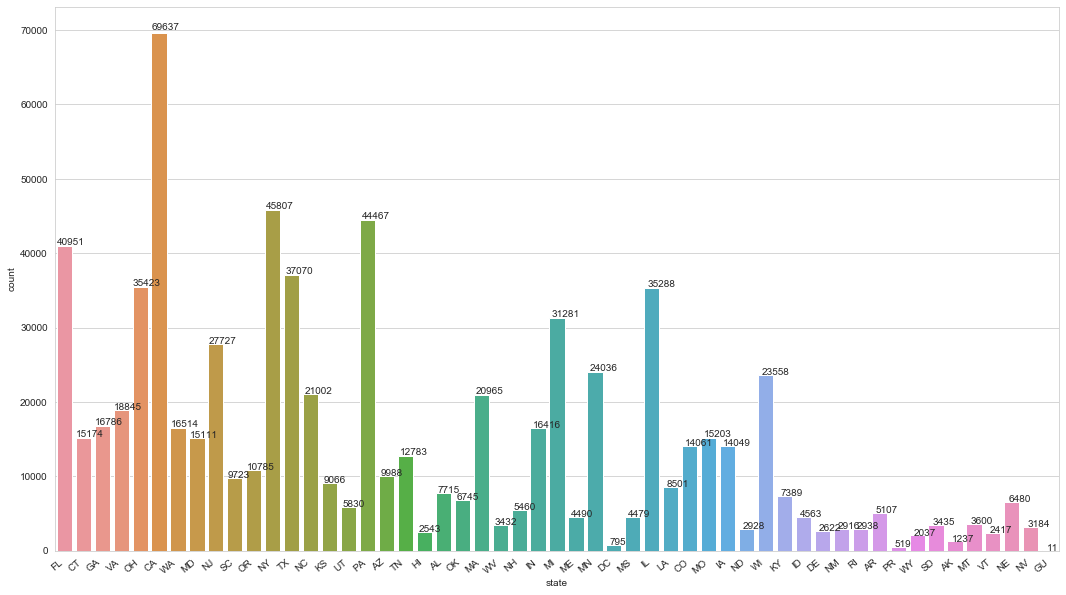

In [41]:
#state having more transactions
plt.figure(figsize=(18,10))
ax = sns.countplot(x="state", data=data, label='Alone')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

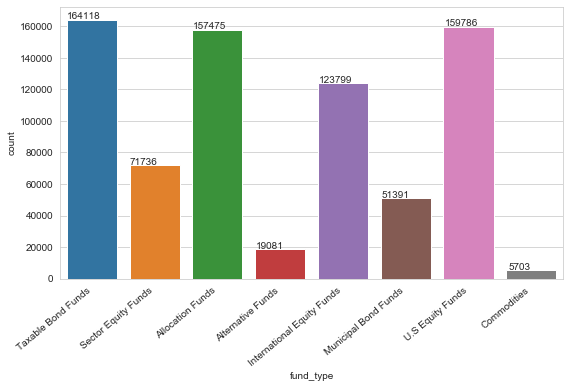

In [42]:
#funds having more transactions
plt.figure(figsize=(9,5))
ax = sns.countplot(x="fund_type", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

<IPython.core.display.Javascript object>

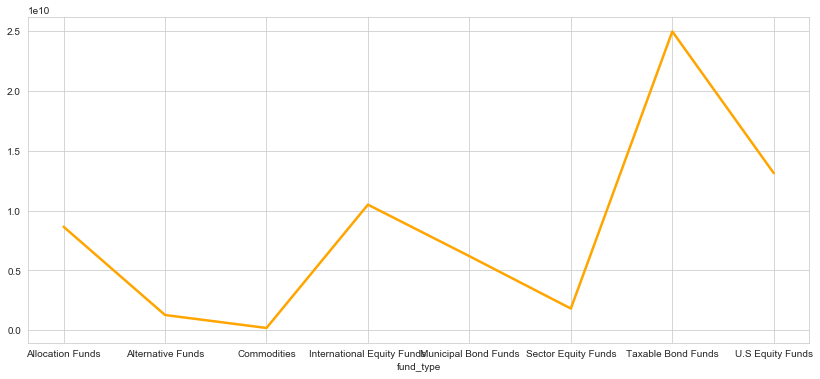

In [43]:
#plot data
fig, ax = plt.subplots(figsize=(14,6))
data.groupby(['fund_type']).sum()['global_sales'].plot(ax=ax, color='orange', linewidth=2.5)

<IPython.core.display.Javascript object>

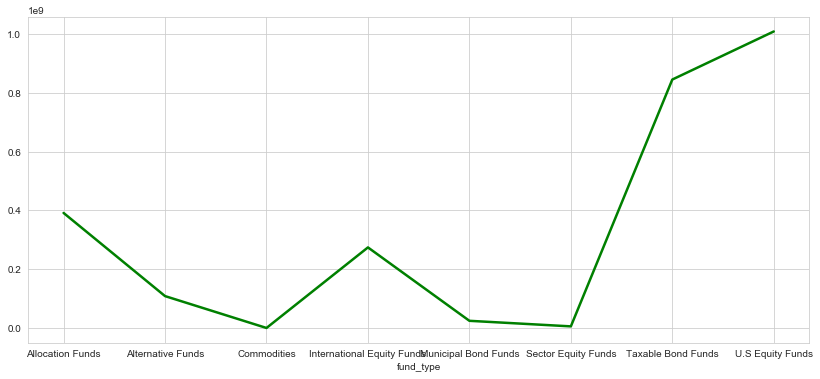

In [44]:
#plot data
fig, ax = plt.subplots(figsize=(14,6))
data.groupby(['fund_type']).sum()['firm_sales'].plot(ax=ax, color='green', linewidth=2.5)

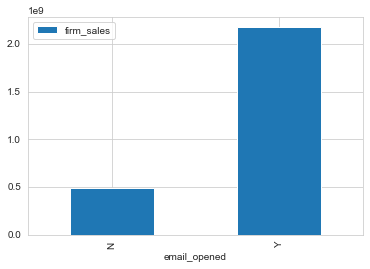

In [45]:
#sales happened with email_opened
df = data[["email_opened", "firm_sales"]]
df.groupby("email_opened").sum().plot(kind="bar")

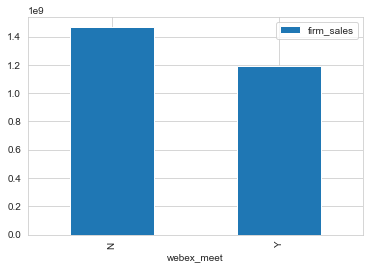

In [46]:
#sales happened with webex
df = data[["webex_meet", "firm_sales"]]
df.groupby("webex_meet").sum().plot(kind="bar")

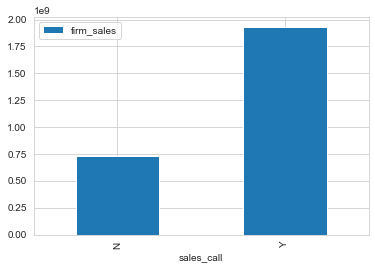

In [47]:
#sales happened with sales_call
df = data[["sales_call", "firm_sales"]]
df.groupby("sales_call").sum().plot(kind="bar")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

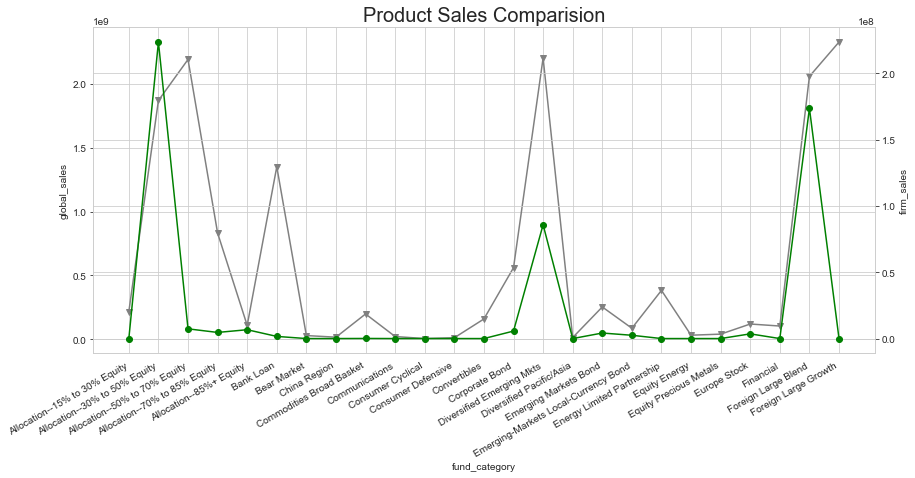

In [53]:
#Product Wise Comparison Sales (firm and Global)
a = data.groupby(['fund_category'], as_index=False)['firm_sales','global_sales'].sum()
b = a.head(25)
x = b['fund_category']
y = b['global_sales']
y1 =b['firm_sales']
fig, ax1 = plt.subplots(figsize=(14,6))
ax2 = ax1.twinx()
ax1.plot(x, y, 'v-',color='grey')
ax2.plot(x, y1, 'o-', color="green" )
ax1.set_xlabel('fund_category')
plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
ax1.set_ylabel('global_sales')
ax2.set_ylabel('firm_sales')
ax1.axes.set_title("Product Sales Comparision",fontsize=20)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

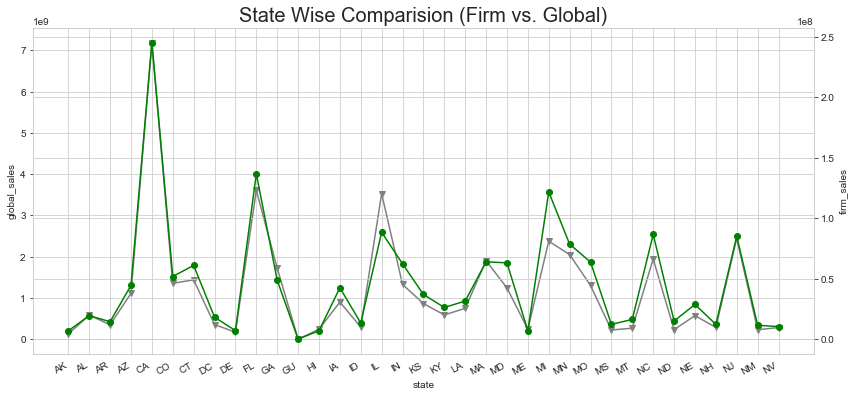

In [54]:
#Sate Wise Comparison Sales (firm and Global)
a = data.groupby(['state'], as_index=False)['firm_sales','global_sales'].sum()
b = a.head(35)
x = b['state']
y = b['global_sales']
y1 =b['firm_sales']
fig, ax1 = plt.subplots(figsize=(14,6))
ax2 = ax1.twinx()
ax1.plot(x, y, 'v-',color='grey')
ax2.plot(x, y1, 'o-', color="green" )
ax1.set_xlabel('state')
plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
ax1.set_ylabel('global_sales')
ax2.set_ylabel('firm_sales')
ax1.axes.set_title("State Wise Comparision (Firm vs. Global)",fontsize=20)
plt.show()

## Insights

In [55]:
total_global_sales = data['global_sales'].sum()
print("$", total_global_sales/1000000000,"B" )

$ 66.73567647443 B


In [56]:
total_firm_sales = data['firm_sales'].sum()
print("$", total_firm_sales/1000000000,"B" )

$ 2.657022163629999 B


In [57]:
print("Percentage of our Firm Contibution",(total_firm_sales/total_global_sales)*100,"%")

Percentage of our Firm Contibution 3.9814118983989704 %


In [58]:
a = data.groupby('fund_type')['firm_sales'].sum().sort_values(ascending=False)
a

fund_type
U.S Equity Funds              1.008358e+09
Taxable Bond Funds            8.449114e+08
Allocation Funds              3.912271e+08
International Equity Funds    2.740267e+08
Alternative Funds             1.084823e+08
Municipal Bond Funds          2.442198e+07
Sector Equity Funds           5.520139e+06
Commodities                   7.442886e+04
Name: firm_sales, dtype: float64

In [59]:
#firm sales by email opened
x = data.groupby('email_opened')['firm_sales'].sum()
x

email_opened
N    4.848210e+08
Y    2.172201e+09
Name: firm_sales, dtype: float64

In [60]:
total = (4.848210e+08+2.172201e+09)
email_opened_N = (4.848210e+08 / total) *100
email_opened_Y = (2.172201e+09 / total) *100
print(email_opened_Y,"%", email_opened_N,"%")

81.7532184528393 % 18.246781547160694 %


In [61]:
#firm sales by webex meeting
y = data.groupby('webex_meet')['firm_sales'].sum()
y

webex_meet
N    1.465026e+09
Y    1.191996e+09
Name: firm_sales, dtype: float64

In [62]:
total = (1.465026e+09+1.191996e+09)
webex_N = (1.465026e+09 / total) *100
webex_Y = (1.191996e+09 / total) *100
print(webex_Y,"%", webex_N,"%")

44.862105018325025 % 55.137894981674975 %


In [63]:
#firm sales by sales call
z =data.groupby('sales_call')['firm_sales'].sum()
z

sales_call
N    7.309740e+08
Y    1.926048e+09
Name: firm_sales, dtype: float64

In [64]:
total = (1.926048e+09+7.309740e+08)
sales_call_N = (7.309740e+08 / total) *100
sales_call_Y = (1.926048e+09 / total) *100
print(sales_call_Y,"%", sales_call_N,"%")

72.4889744985175 % 27.51102550148249 %


In [65]:
#top product for firm
data.groupby('fund_category')['firm_sales'].sum().sort_values(ascending=False)

fund_category
Intermediate-Term Bond           4.366743e+08
Large Value                      3.615368e+08
Allocation--30% to 50% Equity    2.236338e+08
Large Growth                     1.822481e+08
Foreign Large Blend              1.736723e+08
                                     ...     
Global Real Estate               0.000000e+00
Foreign Small/Mid Value          0.000000e+00
Foreign Small/Mid Growth         0.000000e+00
Foreign Small/Mid Blend          0.000000e+00
World Small/Mid Stock            0.000000e+00
Name: firm_sales, Length: 103, dtype: float64

In [66]:
#top product for global
data.groupby('fund_category')['global_sales'].sum().sort_values(ascending=False)

fund_category
Intermediate-Term Bond    5.797888e+09
Multisector Bond          4.517951e+09
Large Growth              3.776700e+09
Short-Term Bond           3.597911e+09
Ultrashort Bond           3.287539e+09
                              ...     
Target-Date 2000-2010     5.452781e+06
Target-Date 2060+         5.449289e+06
Consumer Cyclical         3.918551e+06
Latin America Stock       2.093504e+06
Miscellaneous Region      3.932892e+05
Name: global_sales, Length: 103, dtype: float64

In [67]:
#top city for sales
data.groupby('city')['firm_sales'].sum().sort_values(ascending=False)

city
NEW YORK         68757803.05
HOUSTON          47093626.81
SAN DIEGO        28177441.78
PORTLAND         25772097.11
SAN FRANCISCO    24011276.18
                    ...     
PENHOOK                 0.00
SIGNAL HILL             0.00
GALENA                  0.00
MINE HILL               0.00
LUCINDA                 0.00
Name: firm_sales, Length: 7272, dtype: float64

In [68]:
#top broker for our firm
data.groupby('broker_id')['firm_sales'].sum().sort_values(ascending=False)

broker_id
BRXX-298    5.748833e+08
BRXX-53     2.165282e+08
BRXX-154    2.155913e+08
BRXX-262    1.998988e+08
BRXX-3      1.454181e+08
                ...     
BRXX-623    0.000000e+00
BRXX-622    0.000000e+00
BRXX-621    0.000000e+00
BRXX-620    0.000000e+00
BRXX-468    0.000000e+00
Name: firm_sales, Length: 1178, dtype: float64